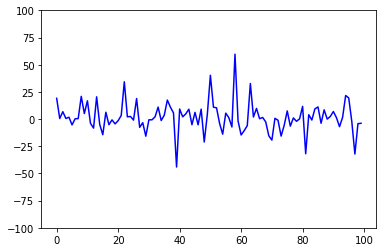

In [2]:
import matplotlib.pyplot as plt

#laplace noise generating code 1
from math import log
from random import random

def laprnd1(scale):
    def exp_sample(mean):
        return -mean*log(1.0 - random())
    e1 = exp_sample(scale)
    e2 = exp_sample(scale)
    return e1 - e2


sample_list1 = []
for i in range(100):
    sample_list1.append(laprnd1(100/10))
# print(sample_list)
# avg = np.array(sample_list1).mean()
# print(avg)

plt.ylim(-100, 100)
plt.figure(1)
plt.plot(sample_list1, '-b')

plt.show()

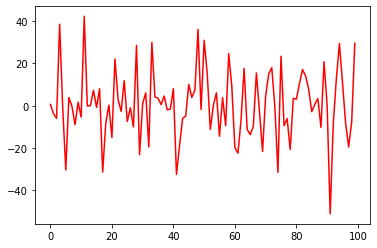

In [10]:
# #laplace noise generating code 2 by sum
from scipy.stats import laplace
import numpy as np
from sympy import Symbol, exp, sqrt, pi, Integral
import math

def laprnd2(loc,scale):
    s = laplace.rvs(loc, scale, None)
    return s

sample_list2 = []

for i in range(100):
    sample_list2.append(laprnd2(0, 100/10))
# print(sample_list1)
# avg = np.array(sample_list2).mean()
# print(avg)

plt.figure(2)
plt.plot(sample_list2, '-r')
plt.show()

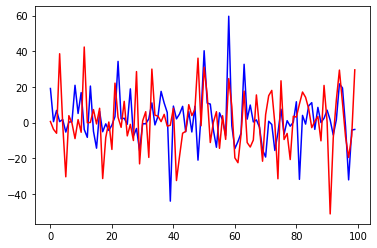

laprnd 1 평균 :  1.7018167995922575 laprnd 2 평균 :  0.6839770365304632


In [11]:
plt.plot(sample_list1, '-b')
plt.plot(sample_list2, '-r')
plt.show()
print('laprnd 1 평균 : ',np.array(sample_list1).mean(), 'laprnd 2 평균 : ', np.array(sample_list2).mean())

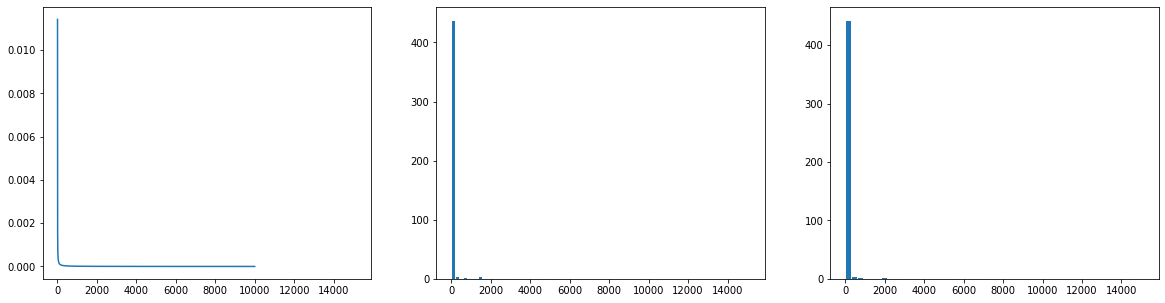

In [27]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

N = 79    #number of people
slot_size = 66    #number of time period 
sensitivity, epsilon = 7000, 1.0
shape,scale = 1/N, (sensitivity/N)/(epsilon/slot_size)

# sensitivity, epsilon = 7000, 2
# shape,scale = 10, (sensitivity/79)/(epsilon/66)

Gamma = gamma(a = shape, scale = scale)
x = np.arange(1,10000)

fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (20,5), sharex = True)

ax[0].plot(x, Gamma.pdf(x));

ax[1].hist(Gamma.rvs(460), edgecolor = 'white', bins = 50);


samps = np.concatenate([Gamma.rvs(j) for j in [200, 200, 50 , 10]])
ax[2].hist(samps, edgecolor = 'white', bins = 50);

fig.show()